In [2]:
pip install kagglehub

  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/49/bf/c2a24567bb6bd80c1fe7cb2ed1a332666476f69c313256aff96094bef93e/kagglehub-0.3.12-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
   ---------------------------------------- 68.0/68.0 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dataclusterlabs/domestic-trash-garbage-dataset")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 844M/844M [00:48<00:00, 18.3MB/s]

Extracting files...


Path to dataset files: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3


In [16]:
pip install pandas matplotlib seaborn opencv-python scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from collections import Counter
from tqdm import tqdm


In [25]:
import os

dataset_path = r"C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3"

categories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print("Categories found:", categories)

for category in categories:
    category_path = os.path.join(dataset_path, category)
    print(f"\nInspecting: {category_path}")
    print("Files:", os.listdir(category_path))


Categories found: ['annotation', 'trash']

Inspecting: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\annotation
Files: ['trash annotated']

Inspecting: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash
Files: ['trash']


In [28]:
import os

dataset_path = r"C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3"

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            print("📸 Found image at:", os.path.join(root, file))


📸 Found image at: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash\Datacluster Trash (1).jpg
📸 Found image at: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash\Datacluster Trash (10).jpg
📸 Found image at: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash\Datacluster Trash (100).jpg
📸 Found image at: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash\Datacluster Trash (101).jpg
📸 Found image at: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash\Datacluster Trash (102).jpg
📸 Found image at: C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash\Datacluster Trash (103).jpg
📸 Found image at: C:\Users\eshit\.cache\kagglehub\datasets\da

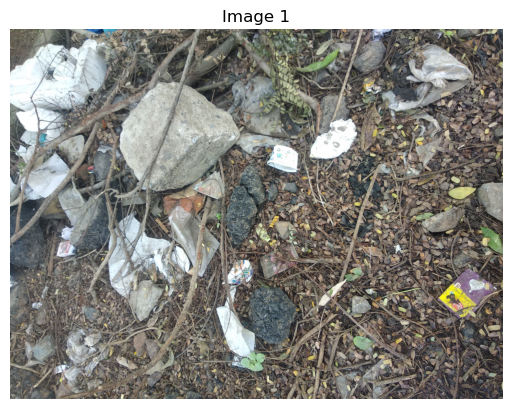

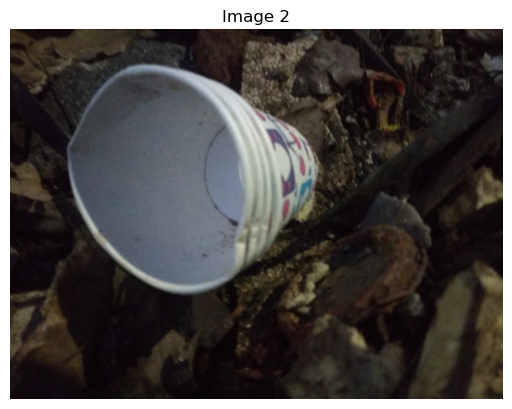

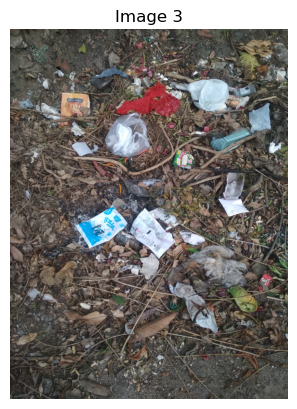

In [30]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Redefine the folder path
image_folder = r"C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash"

# List of image files
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 3 images
for i in range(3):
    img_path = os.path.join(image_folder, image_files[i])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()


# Now let’s count and visualize the images:

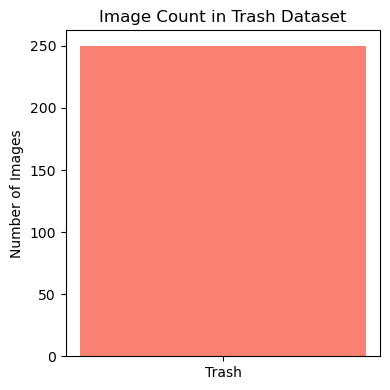

In [32]:
import os
import matplotlib.pyplot as plt

# Folder containing the images
image_folder = r"C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash"

# Count images
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_count = len(image_files)

# Plot
plt.figure(figsize=(4, 4))
plt.bar(["Trash"], [image_count], color="salmon")
plt.title("Image Count in Trash Dataset")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


In [37]:
import os
import shutil
import random

# Original folder with all images
source_folder = r"C:\Users\eshit\.cache\kagglehub\datasets\dataclusterlabs\domestic-trash-garbage-dataset\versions\3\trash\trash"

# New dataset base path
base_path = r"C:\Users\eshit\Desktop\trash_dataset"  # Change if needed
train_path = os.path.join(base_path, "train", "trash")
test_path = os.path.join(base_path, "test", "trash")

# Create folders
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Split images (e.g., 80% train, 20% test)
image_files = [f for f in os.listdir(source_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(image_files)

split_idx = int(0.8 * len(image_files))
train_files = image_files[:split_idx]
test_files = image_files[split_idx:]

# Copy files
for f in train_files:
    shutil.copy(os.path.join(source_folder, f), os.path.join(train_path, f))

for f in test_files:
    shutil.copy(os.path.join(source_folder, f), os.path.join(test_path, f))

print(f"✅ Train images: {len(train_files)}")
print(f"✅ Test images: {len(test_files)}")


✅ Train images: 200
✅ Test images: 50


# Simulate daily fills and calculate % full

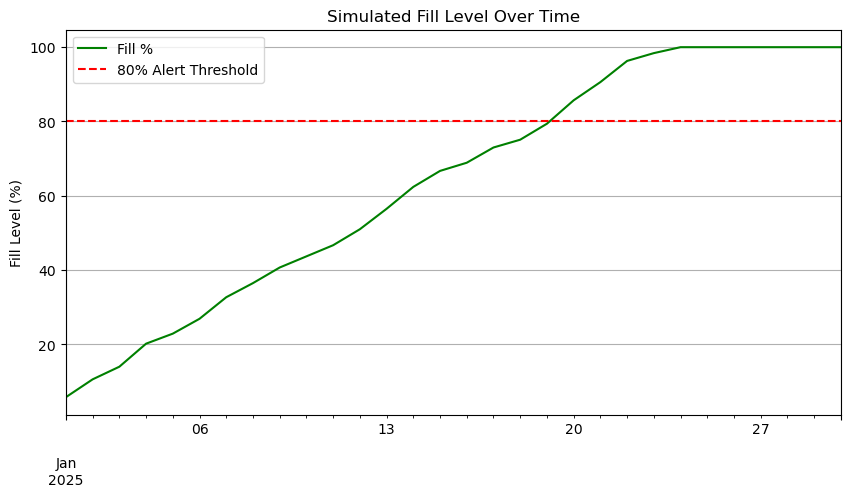

In [40]:
import numpy as np
import datetime

# Simulate 30 days of waste arrival
days = pd.date_range(start="2025-01-01", periods=30)
np.random.seed(42)

daily_fill = pd.Series(
    np.random.randint(20, 70, size=len(days)),  # Simulate daily incoming units
    index=days
)

site_capacity = 1000
cumulative_fill = daily_fill.cumsum().clip(upper=site_capacity)
fill_percent = (cumulative_fill / site_capacity * 100).round(2)

# Plot
plt.figure(figsize=(10,5))
fill_percent.plot(label='Fill %', color='green')
plt.axhline(80, color='red', linestyle='--', label='80% Alert Threshold')
plt.ylabel('Fill Level (%)')
plt.title('Simulated Fill Level Over Time')
plt.legend()
plt.grid()
plt.show()


# TASK 3: Alert System Prototyping

In [41]:
# Trigger alerts when fill level ≥ 80%
alert_threshold = 80
alerts = fill_percent[fill_percent >= alert_threshold]

for date, percent in alerts.items():
    print(f"🚨 ALERT [{date.date()}]: Site is {percent}% full. Schedule collection!")


🚨 ALERT [2025-01-20]: Site is 85.7% full. Schedule collection!
🚨 ALERT [2025-01-21]: Site is 90.6% full. Schedule collection!
🚨 ALERT [2025-01-22]: Site is 96.3% full. Schedule collection!
🚨 ALERT [2025-01-23]: Site is 98.4% full. Schedule collection!
🚨 ALERT [2025-01-24]: Site is 100.0% full. Schedule collection!
🚨 ALERT [2025-01-25]: Site is 100.0% full. Schedule collection!
🚨 ALERT [2025-01-26]: Site is 100.0% full. Schedule collection!
🚨 ALERT [2025-01-27]: Site is 100.0% full. Schedule collection!
🚨 ALERT [2025-01-28]: Site is 100.0% full. Schedule collection!
🚨 ALERT [2025-01-29]: Site is 100.0% full. Schedule collection!
🚨 ALERT [2025-01-30]: Site is 100.0% full. Schedule collection!


# ✅ TASK 4: Optimization Strategy

In [42]:
avg_daily_fill = daily_fill.mean()
estimated_days_to_fill = int(site_capacity / avg_daily_fill)

print(f"Average daily waste inflow: {avg_daily_fill:.2f} units/day")
print(f"Estimated full capacity reached in ~{estimated_days_to_fill} days")

# Suggested strategy
print("\n📌 Suggested Collection Strategy:")
print("- Collect every 10 days for moderate sites.")
print("- Monitor fast-filling sites every 5–7 days.")
print("- Enable dynamic routing using current fill status.")


Average daily waste inflow: 44.10 units/day
Estimated full capacity reached in ~22 days

📌 Suggested Collection Strategy:
- Collect every 10 days for moderate sites.
- Monitor fast-filling sites every 5–7 days.
- Enable dynamic routing using current fill status.
